In [1]:
import warnings
import itertools
import pandas as pd
import numpy as np
import seaborn as sns
import statsmodels.api as sm
import matplotlib.pyplot as plt

In [2]:
gold_data=pd.read_csv('S://GoldProduction.csv', encoding='latin1')
gold_data.head()

,COUNTRY,QUANTITY IN TONNES Y2018,QUANTITY IN TONNES Y2019
0,Switzerland,1200,1360
1,Hong Kong,328,697
2,United Kingdom,330,496
3,United Arab Emirates,387,1132
4,United States,181,263


In [3]:
new_data=gold_data.drop('QUANTITY IN TONNES Y2018', axis=1)
new_data.head()

,COUNTRY,QUANTITY IN TONNES Y2019
0,Switzerland,1360
1,Hong Kong,697
2,United Kingdom,496
3,United Arab Emirates,1132
4,United States,263


Convert to stationary data

plot correlation and autocorrelation

create Arima model

In [4]:
new_data.set_index('COUNTRY',inplace=True)


In [5]:
new_data.head()

,QUANTITY IN TONNES Y2019
COUNTRY,
Switzerland,1360
Hong Kong,697
United Kingdom,496
United Arab Emirates,1132
United States,263


From the above output we can see now the 'COUNTRY' column is the index, 

Generate reports by visualization

Noiw let's visualize the data to get some reports about the quantity produced as per the dataset. 

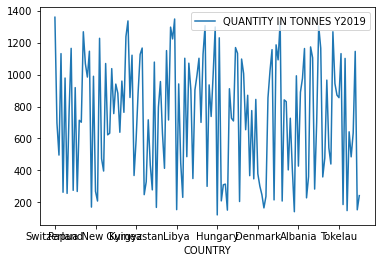

In [6]:
new_data.plot()

# DATA PREPARATION FOR MODEL CREATION

To predict a time series in ARIMA it is advisable to make the dataset stationary. 

The following step stationarizes the dataset, while using the adfuller library from the statsmodels.

In [22]:
#stationarizing the data
from statsmodels.tsa.stattools import adfuller

In [23]:
test_results=adfuller(new_data['QUANTITY IN TONNES Y2019'])

In [24]:
#Function to check stationarity. The adfuller library gives 4, items, ADF test, p-value, Lags used and number of observation.
#In this function, we  
#Adfuller uses hypothesis to test stationarity. H0 n H1. 
#This function uses both H0 and H1 hypothesis to make the 
#If p-value is less than 0.5 data is stationary, 
def adfuller_test(sales):
    result=adfuller(sales)
    labels=['ADF test statistic', 'p-value', '#Lags Used', 'Number of observations']
    for value, label in zip(result,labels):
        print(label+':'+str(value))
        if result[1]<=0.05:
            print('Strong evidence against null value so we reject the null hypothesis')
        else:
            print('weak evidence agaist null value and so we accept the null hypothesis')

In [25]:
adfuller_test(new_data['QUANTITY IN TONNES Y2019'])

ADF test statistic:-13.333022300450637
Strong evidence against null value so we reject the null hypothesis
p-value:6.129533661001048e-25
Strong evidence against null value so we reject the null hypothesis
#Lags Used:0
Strong evidence against null value so we reject the null hypothesis
Number of observations:150
Strong evidence against null value so we reject the null hypothesis


Now our data is stationary.

Defferencing 

Deferencing is done to make the data stationary. 

In [26]:
#In this we take the column subtract with the above value to shift by one value for differencing.
new_data['QUANTITY-DIFFERENCE']=new_data['QUANTITY IN TONNES Y2019']-new_data['QUANTITY IN TONNES Y2019'].shift(1)

In [12]:
#This is used when the the data goes for 12 months.
#new_data['Seasonal-First-Difference']=new_data['QUANTITY IN TONNES Y2019']-new_data['QUANTITY IN TONNES Y2019'].shift(12)

In [27]:
#We do a seasonal differencing. We take the 'QUANTITY-DIFFERENCE' then pass it to the adfuller_test to check and set stationarity, then we drop the null value at the top.
adfuller_test(new_data['QUANTITY-DIFFERENCE'].dropna())

ADF test statistic:-6.195372314951484
Strong evidence against null value so we reject the null hypothesis
p-value:5.983294769439308e-08
Strong evidence against null value so we reject the null hypothesis
#Lags Used:14
Strong evidence against null value so we reject the null hypothesis
Number of observations:135
Strong evidence against null value so we reject the null hypothesis


From the above output we can see that the data is stationary. It can be used to create good perfoming model.

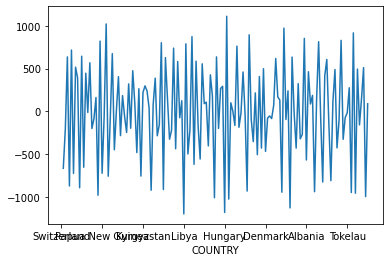

In [28]:
#Let's plot and see how the plot looks like
new_data['QUANTITY-DIFFERENCE'].plot()

from the above we see our data is now stationary and can be used in ARIMA model to predict 

Auto regrtessive model 

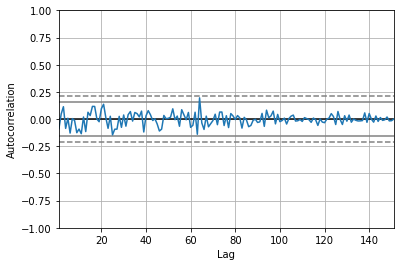

In [29]:
from pandas.plotting import autocorrelation_plot
autocorrelation_plot(new_data['QUANTITY IN TONNES Y2019'])
plt.show()

Arima has 3 autoregregraion, differencing and moving average,
We've to identify the AR model using the PACF (Partial Autocorrelation)
PACF uses p,d,q whereby: 

p=period taken for autoregressive mode, AR model lags, 

d=differencing or intergrated order

q=moving average lags


In [30]:
#We want to set and plot the p,d,q values to prepare acf and pacf values.
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

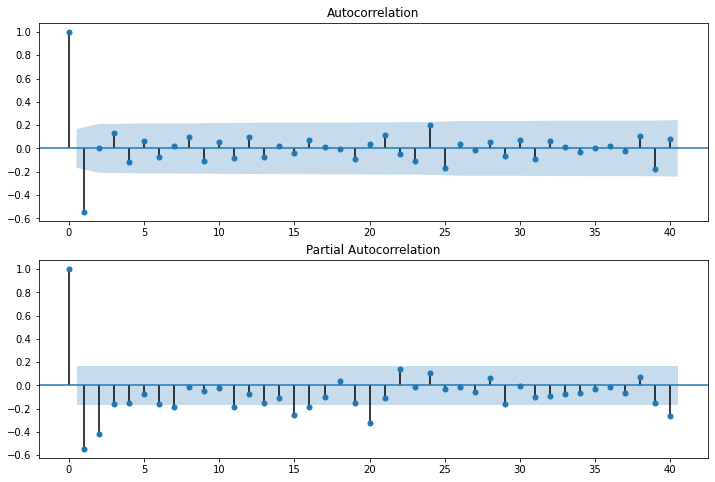

In [31]:
fig=plt.figure(figsize=(12,8))
ax1=fig.add_subplot(211)
fig=sm.graphics.tsa.plot_acf(new_data['QUANTITY-DIFFERENCE'].iloc[13:],lags=40,ax=ax1)
ax2=fig.add_subplot(212)
fig=sm.graphics.tsa.plot_pacf(new_data['QUANTITY-DIFFERENCE'].iloc[13:],lags=40,ax=ax2)

# Model input

Here we first split the dataset into train and test set, later we input the model ARIMA and add the model accuracy evaluation technique by checiking the mean_squar_error.

Later we will plot the predictions of the 'QUANTITY IN TONNES Y2019' for the next year. 

In [35]:
X=new_data.values
train = X[0:320]
test = X[320:]
predictions = []

In [36]:
train.size

302

In [39]:
#p=1, d=1,q=1
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error#Checking the accuracy of the model
model_ar=ARIMA(train)
model_ar_fit=model_ar.fit()

TypeError: __new__() missing 1 required positional argument: 'order'

In [51]:
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error
#model_arima_fit=ARIMA(train, order=(1,1,1))
model_arima_fit=ARIMA(train.reshape(-1).tolist(), order=(2,1,2))
model_arima_fit=model_arima.fit()
#model = ARIMA(history.values.reshape(-1).tolist(), order=(2,1,2))

NameError: name 'model_arima' is not defined

In [41]:
prediction=model_ar_fit.predict(start=370,end=453)

NameError: name 'model_ar_fit' is not defined

NameError: name 'prediction' is not defined

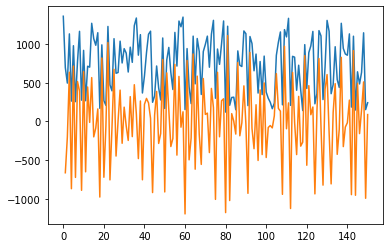

In [42]:
plt.plot(train)
plt.plot(prediction,color='red')


In [43]:
import warnings
warnings.filterwarnings('ignore')
model=ARIMA(new_data['QUANTITY IN TONNES Y2019'],order=(1,1,1))#p,d,q
model_fit=model.fit()

In [44]:
#Now we want to get the summary details of the ARIMA model.
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 ARIMA Model Results                                  
======================================================================================
Dep. Variable:     D.QUANTITY IN TONNES Y2019   No. Observations:                  150
Model:                         ARIMA(1, 1, 1)   Log Likelihood               -1101.980
Method:                               css-mle   S.D. of innovations            368.813
Date:                        Wed, 14 Oct 2020   AIC                           2211.960
Time:                                13:33:14   BIC                           2224.002
Sample:                                     1   HQIC                          2216.852
                                                                                      
====================================================================================================
                                       coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
const                               -0.6915      0.634     -1.090      0.276      -1.935       0.552
ar.L1.D.QUANTITY IN TONNES Y2019    -0.0875      0.082     -1.063      0.288      -0.249       0.074
ma.L1.D.QUANTITY IN TONNES Y2019    -1.0000      0.018    -54.841      0.000      -1.036      -0.964
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1          -11.4269           +0.0000j           11.4269            0.5000
MA.1            1.0000           +0.0000j            1.0000            0.0000
-----------------------------------------------------------------------------
"""

From the output above we discover that, the model has coefficient of -0.6915, standard error 0.634 and P-value of 0.276

In [45]:
#Now creating the ARIMA model
import statsmodels.api as sm

In [46]:

model=sm.tsa.statespace.SARIMAX(new_data['QUANTITY IN TONNES Y2019'],order=(1,1,1), seasonal_order=(1,1,1,12))
results=model.fit()

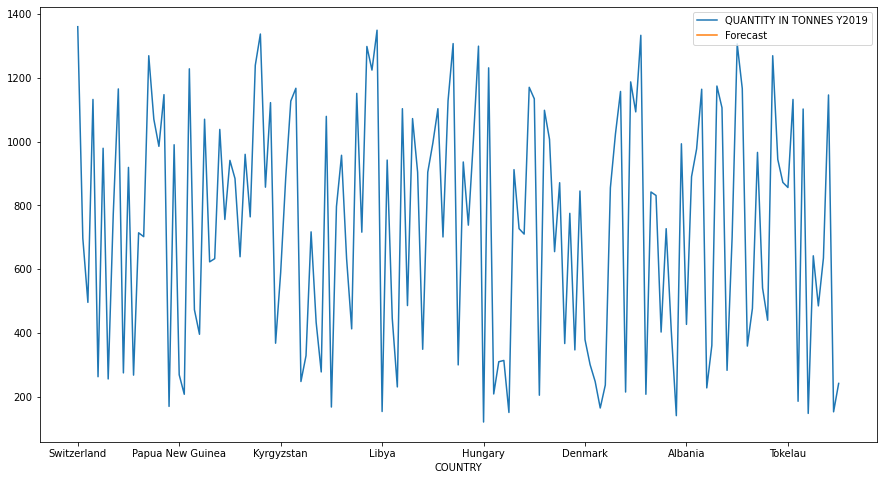

In [47]:
# Import seaborn
import seaborn as sns
new_data['Forecast']=results.predict(start=133,end=1360,dynamuc=True)
new_data[['QUANTITY IN TONNES Y2019','Forecast']].plot(figsize=(15,8))